### 실제 데이터로 만들어보는 모델
#### 1.  데이터 파악하기

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 집 값 데이터를 불러오기
df = pd.read_csv("./data_set/house_train.csv")
# 데이터 확인
df


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
#데이터 타입 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.dtypes.head(28)

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
dtype: object

#### 2.결측치, 카테고리 변수 처리

In [6]:
df.isnull().sum().sort_values(ascending=False).head(28)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
dtype: int64

In [10]:
#카테고리형 변수를 0과 1로 인코딩
df = pd.get_dummies(df)

#결측치를 전체 컬럼의 평균으로 대체
df = df.fillna(df.mean())

#최종 프레임 출력
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,False,False,False,True,True,False,False,False,False,False
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,False,False,False,True,False,False,False,False,True,False
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,False,False,False,True,False,False,False,False,True,False
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,False,False,False,True,False,False,False,False,True,False
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,False,False,False,True,False,False,False,False,True,False


In [12]:
#결측치 처리 확인
df.isnull().sum().sort_values(ascending=False).head(28)

Id                    0
Exterior1st_Stucco    0
BsmtFinType1_GLQ      0
BsmtFinType1_BLQ      0
BsmtFinType1_ALQ      0
BsmtExposure_No       0
BsmtExposure_Mn       0
BsmtExposure_Gd       0
BsmtExposure_Av       0
BsmtCond_TA           0
BsmtCond_Po           0
BsmtCond_Gd           0
BsmtCond_Fa           0
BsmtQual_TA           0
BsmtQual_Gd           0
BsmtQual_Fa           0
BsmtQual_Ex           0
BsmtFinType1_LwQ      0
BsmtFinType1_Rec      0
BsmtFinType1_Unf      0
Heating_GasW          0
HeatingQC_Gd          0
HeatingQC_Fa          0
HeatingQC_Ex          0
Heating_Wall          0
Heating_OthW          0
Heating_Grav          0
Heating_GasA          0
dtype: int64

### 3.속성별 연관관계 추출

In [25]:
#데이터 상관관계 표시
df_corr = df.corr()

#집값과 관련이 큰것부터 순서대로
df_corr_sort = df_corr.sort_values('SalePrice', ascending=False)

#10개 출력
df_corr_sort['SalePrice'].head(10).index.to_list

<bound method IndexOpsMixin.tolist of Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'BsmtQual_Ex', 'TotRmsAbvGrd'],
      dtype='object')>

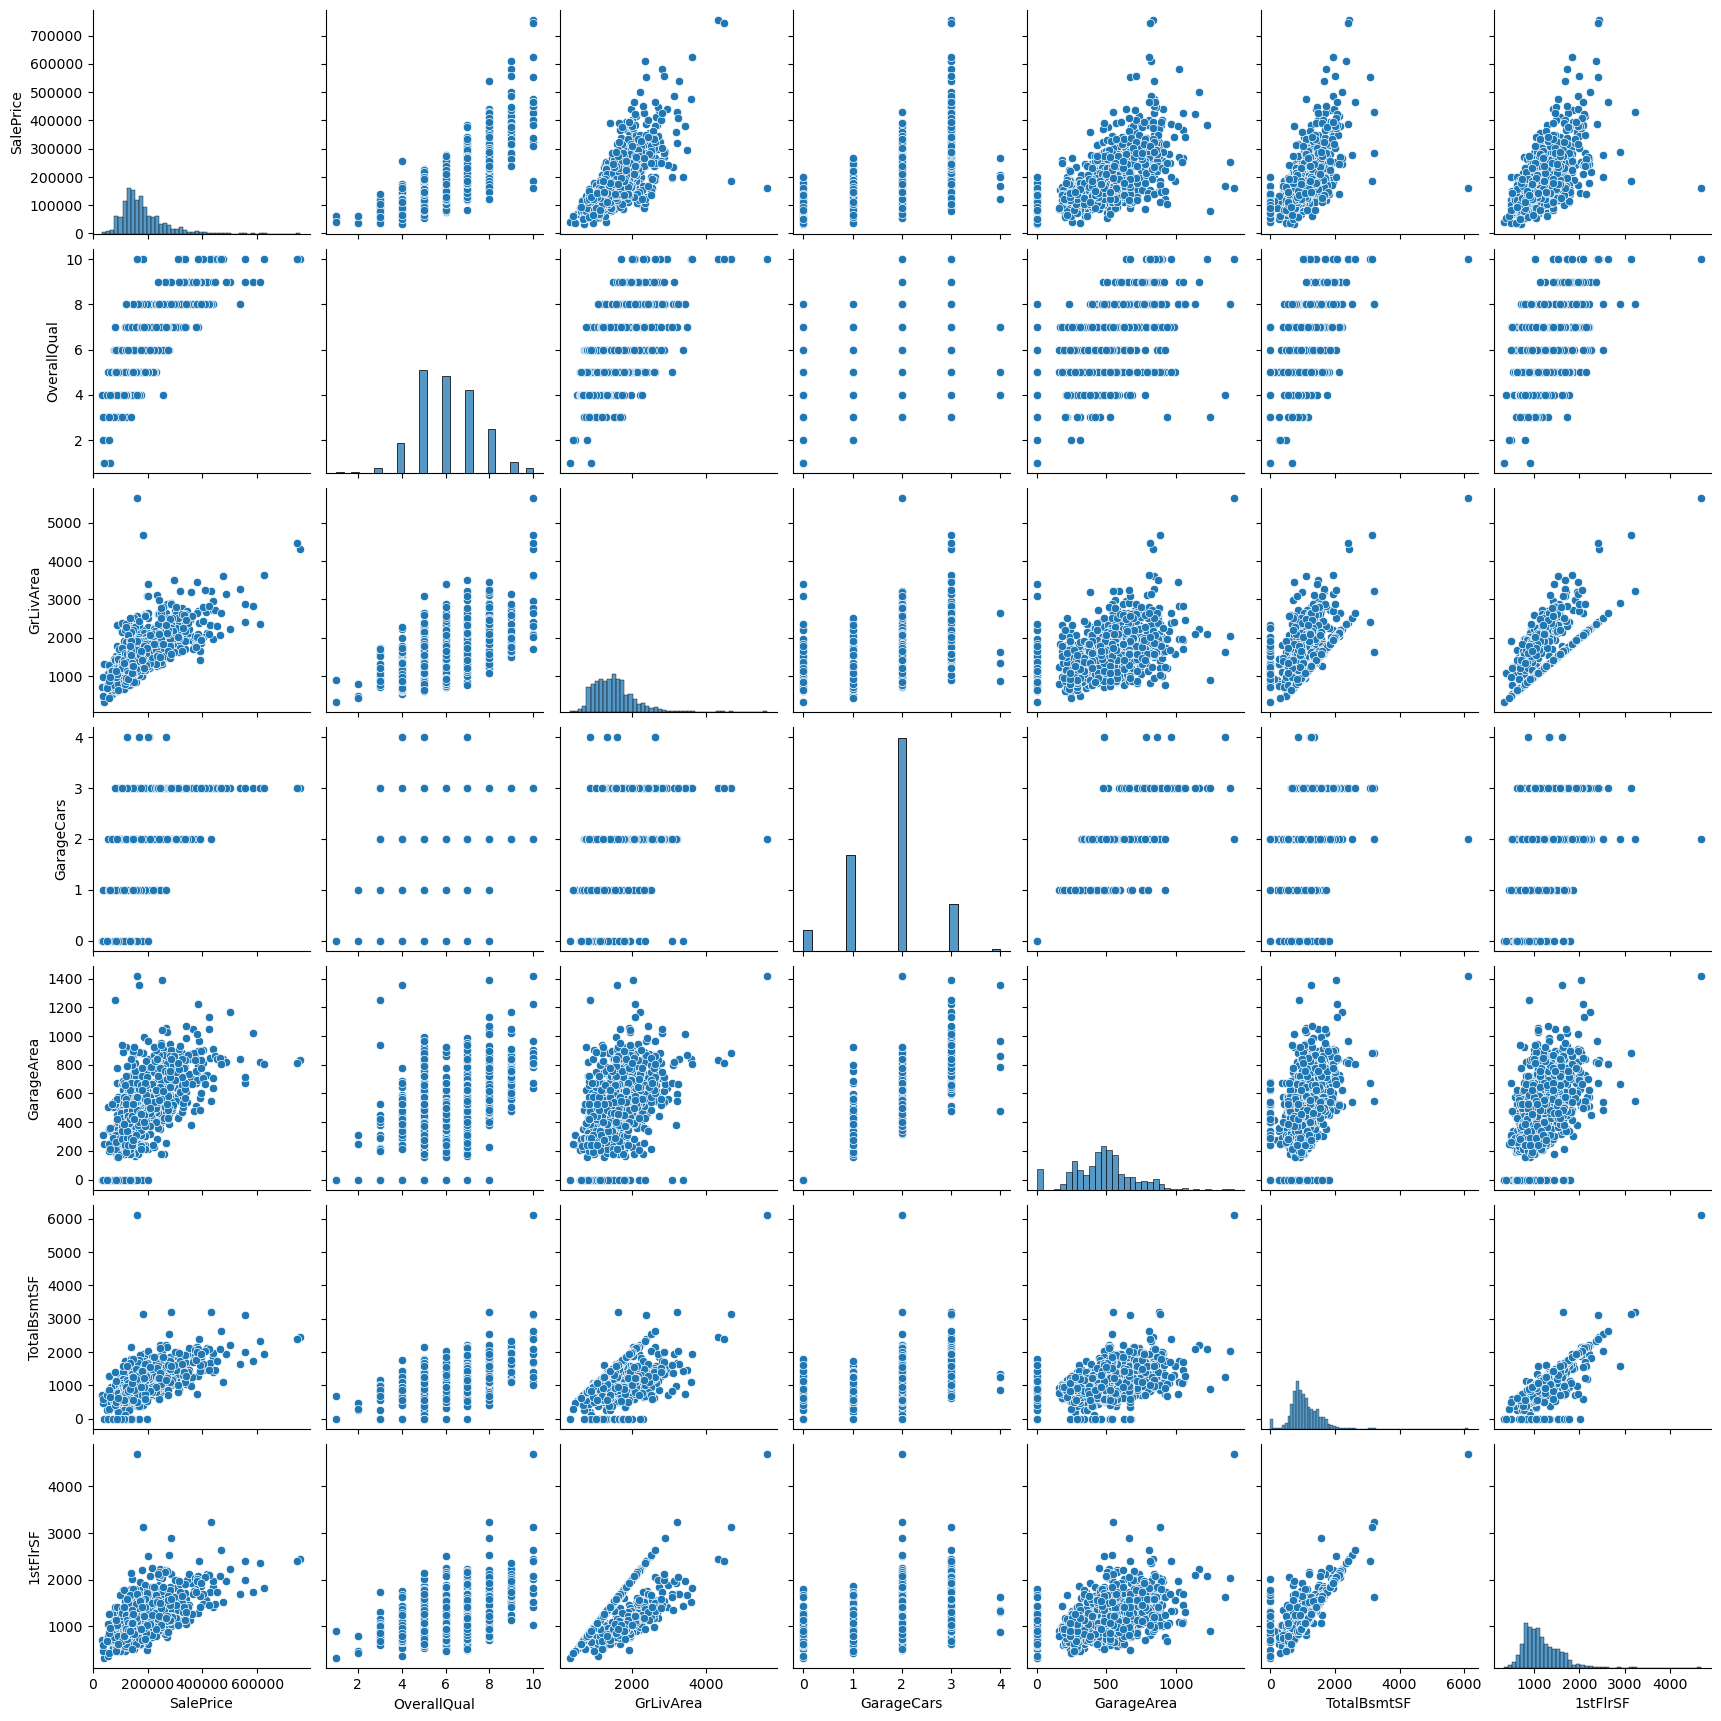

In [44]:
#집값과 관련이 높은 속성들 추출해서 성관도 그래프 그리기

cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF']

sns.pairplot(df[cols])
plt.show()

### 4.주택 가격 예측 모델

##### .remove의 리턴값은 None이다.

In [45]:
#집값 제외 나머지 열 저장
cols.remove('SalePrice')
X_train_pre = df[cols]

y = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size=0.2, random_state=44)

In [49]:
#모델 구조 설정
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
model.summary()


#모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error')

#20회 이상 결과가 향상되지 않으면 자동으로 종료
early_stopping_callback = EarlyStopping(monitor='val_ross', patience=20)

#모델 이름 지정
model_path = './models/house.keras'

#최적화 모델을 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verbose=1, save_best_only=True)

#실행 관련 설정, 검증셋은 전체의 20%로 설정
histroy = model.fit(X_train, y_train, validation_split=0.2, epochs=2000, batch_size=32, callbacks=[early_stopping_callback, checkpointer])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2000
 1/30 [>.............................] - ETA: 10s - loss: 47341264896.0000WARNING:tensorflow:Early stopping conditioned on metric `val_ross` which is not available. Availabl

In [50]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                70        
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 40)                1240      
                                                                 
 dense_3 (Dense)             (None, 1)                 41        
                                                                 
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________


In [52]:
model.predict(X_test).flatten()[:10]

10/10 [==============================] - 0s 834us/step


array([170462.58, 174350.27, 289661.9 , 126435.17, 150771.9 , 167024.61,
       158044.69, 181911.66, 173215.55, 211795.19], dtype=float32)

In [54]:
real_price=[]
pred_price=[]
x_num = []

#25개 샘플 뽑아서 비교
n_iter=0
y_pred = model.predict(X_test).flatten()
for i in range(25):
  real = y_test[i]
  prediction = y_pred[i]
  print(f'실제가격 : {real:.4f}, 예상가격 : {prediction:.4f}, 가격 차이 : {real-prediction:.2f}')
  real_price.append(real)
  pred_price.append(prediction)
  n_iter +=1
  x_num.append(n_iter)

10/10 [==============================] - 0s 834us/step
실제가격 : 139000.0000, 예상가격 : 170462.5781, 가격 차이 : -31462.58
실제가격 : 150750.0000, 예상가격 : 174350.2656, 가격 차이 : -23600.27
실제가격 : 345000.0000, 예상가격 : 289661.9062, 가격 차이 : 55338.09
실제가격 : 133900.0000, 예상가격 : 126435.1719, 가격 차이 : 7464.83
실제가격 : 140000.0000, 예상가격 : 150771.9062, 가격 차이 : -10771.91
실제가격 : 137450.0000, 예상가격 : 167024.6094, 가격 차이 : -29574.61
실제가격 : 156000.0000, 예상가격 : 158044.6875, 가격 차이 : -2044.69
실제가격 : 187000.0000, 예상가격 : 181911.6562, 가격 차이 : 5088.34
실제가격 : 159500.0000, 예상가격 : 173215.5469, 가격 차이 : -13715.55
실제가격 : 248000.0000, 예상가격 : 211795.1875, 가격 차이 : 36204.81
실제가격 : 281213.0000, 예상가격 : 269285.5938, 가격 차이 : 11927.41
실제가격 : 131000.0000, 예상가격 : 146425.4844, 가격 차이 : -15425.48
실제가격 : 108000.0000, 예상가격 : 113842.6953, 가격 차이 : -5842.70
실제가격 : 154000.0000, 예상가격 : 165443.0312, 가격 차이 : -11443.03
실제가격 : 85000.0000, 예상가격 : 131612.8438, 가격 차이 : -46612.84
실제가격 : 315500.0000, 예상가격 : 272943.5000, 가격 차이 : 42556.50
실제가격 : 112000.0000, 예상가격 : 1

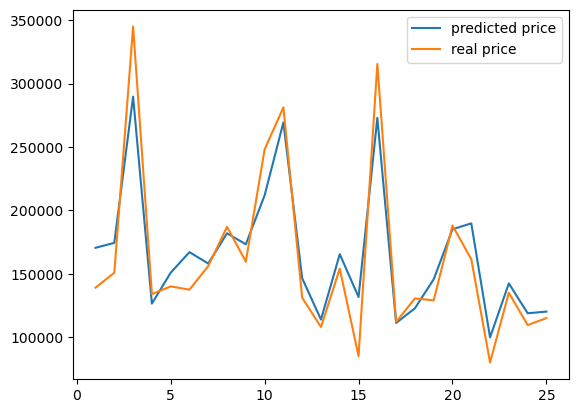

In [55]:
# 그래프를 통해 샘플로 뽑은 25개의 값을 비교해 봅니다.
plt.plot(x_num, pred_price, label='predicted price')
plt.plot(x_num, real_price, label='real price')
plt.legend()
plt.show()